###**EDA_ASSIGNMENT 2 - TEAM EPSILON**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Classified-BioFluidsLab-IITK-JDexperiment.csv')

df.columns=['d', 'B', 'Q', 'dT', 'E']
df.head()
print(len(df))
df = df.dropna()
df = df.reset_index(drop=True)
print(len(df))
print(df)

100000
81598
                  d         B         Q         dT          E
0      1.935247e-09  5.807790  1.771646  15.705398  -3.221133
1      4.758500e-09  5.269716  2.564045   9.550877   0.652858
2      3.033427e-09  4.932127  2.510767  47.348940  -0.819294
3      8.644913e-10  3.650966  1.413866  88.453402 -40.038999
4      8.643731e-10  6.579313  1.749179  30.922074 -26.695892
...             ...       ...       ...        ...        ...
81593  2.125859e-09  1.984443  2.998596  39.162364  -3.345657
81594  3.918339e-09  6.292205  3.315341  27.252781   2.007824
81595  3.404822e-09  1.922037  3.319977  57.558870   0.520562
81596  2.547291e-09  6.530827  0.714425  89.333979  -1.978784
81597  2.010552e-09  0.015601  3.668348  50.242265   0.890610

[81598 rows x 5 columns]


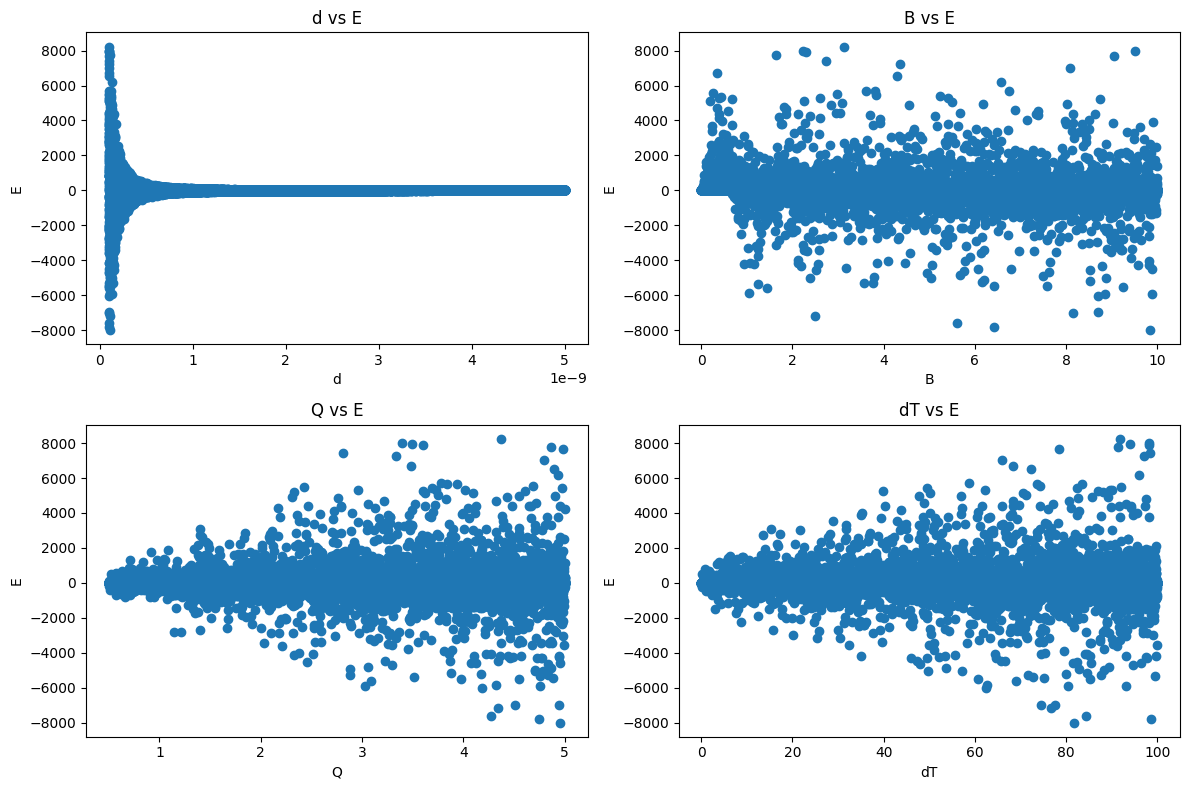

In [9]:
features = ['d', 'B', 'Q', 'dT']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    axes[row, col].scatter(df[feature], df['E'])
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('E')
    axes[row, col].set_title(f'{feature} vs E')

plt.tight_layout()
plt.show()

Checking if there's any relation between the features for same value of E

In [10]:
df['E_rounded'] = df['E'].round()
mode_E_rounded = df['E_rounded'].mode()[0]
filtered_df = df[(df['E_rounded'] == mode_E_rounded)]

print(filtered_df.head())

               d         B         Q         dT         E  E_rounded
7   3.569556e-09  5.094195  0.579507  33.953300  0.067491        0.0
8   4.852558e-09  8.702781  0.785040  57.152068  0.263538        0.0
9   4.178969e-09  2.453958  1.338193  72.508745 -0.236731       -0.0
18  7.835199e-10  2.659591  2.367828  12.427841  0.436904        0.0
22  3.947362e-09  3.875339  0.544191   8.360676  0.112284        0.0


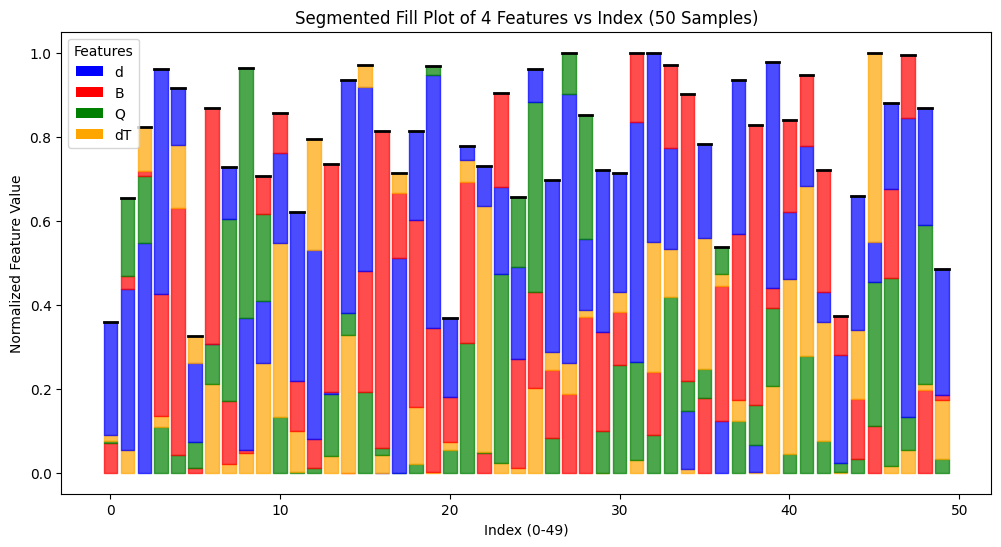

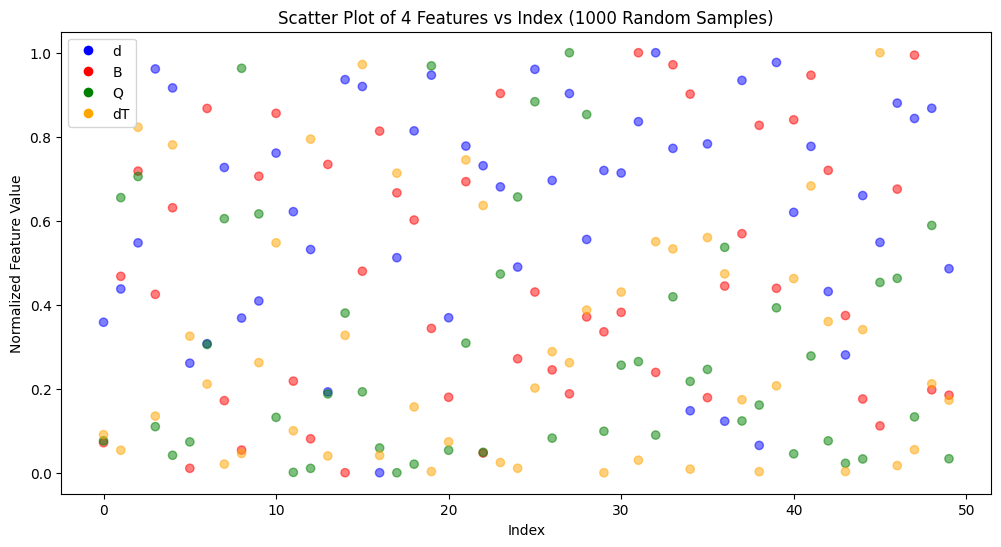

          d         B         Q        dT         E  E_rounded
0  0.358265  0.071466  0.075952  0.090691  0.402390        0.0
1  0.437531  0.467586  0.655027  0.053479  0.183705        0.0
2  0.547289  0.718060  0.705302  0.822418  0.316235        0.0
3  0.961422  0.424706  0.109756  0.134812 -0.267452       -0.0
4  0.916182  0.630894  0.041518  0.780579 -0.479995       -0.0


In [11]:
from sklearn.preprocessing import MinMaxScaler

features = ['d', 'B', 'Q', 'dT']
num_samples = 50

random_indices = np.random.choice(filtered_df.index, size=num_samples, replace=False)
sampled_df = filtered_df.loc[random_indices].reset_index(drop=True)

scaler = MinMaxScaler()
sampled_df[features] = scaler.fit_transform(sampled_df[features])

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['blue', 'red', 'green', 'orange']

for new_idx in range(num_samples):
    feature_values = sampled_df.loc[new_idx, features].values
    sorted_indices = np.argsort(feature_values)
    sorted_values = feature_values[sorted_indices]
    sorted_colors = [colors[i] for i in sorted_indices]
    bottom = 0
    for i in range(len(sorted_values)):
        ax.fill_between([new_idx - 0.4, new_idx + 0.4], bottom, sorted_values[i],
                        color=sorted_colors[i], alpha=0.7)
        bottom = sorted_values[i]
    ax.plot([new_idx - 0.4, new_idx + 0.4], [sorted_values[-1], sorted_values[-1]],
            color='black', linewidth=2)

ax.set_xlabel('Index (0-49)')
ax.set_ylabel('Normalized Feature Value')
ax.set_title('Segmented Fill Plot of 4 Features vs Index (50 Samples)')

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=features[i]) for i in range(len(features))]
ax.legend(handles=legend_elements, title="Features")

plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['blue', 'red', 'green', 'orange']

x_values = np.repeat(sampled_df.index.values, len(features))
y_values = sampled_df[features].values.flatten()
color_values = np.tile(colors, len(sampled_df))

ax.scatter(x_values, y_values, c=color_values, alpha=0.5)

ax.set_xlabel('Index')
ax.set_ylabel('Normalized Feature Value')
ax.set_title('Scatter Plot of 4 Features vs Index (1000 Random Samples)')

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=feature,
                          markerfacecolor=color, markersize=8) for feature, color in zip(features, colors)]
ax.legend(handles=legend_elements)

plt.show()

print(sampled_df.head())

From above, concluded no observable pattern, trying different feature combinations

In [12]:
nw = df.copy()

for feature in features:
    nw[feature + 'inverse'] = 1 / (nw[feature])
    nw[feature + 'inversesq'] = 1 / (nw[feature]) ** 2
    nw[feature + '_sq'] = nw[feature] ** 2
    nw[feature + '_cube'] = nw[feature] ** 3
    nw[feature + '_log'] = np.log1p(nw[feature])
    nw[feature + '_pow4'] = nw[feature] ** 4
    nw[feature + '_pow5'] = nw[feature] ** 5

max_combination_size = 4

for r in range(2, max_combination_size + 1):
    for combination in itertools.combinations(features, r):
        new_col_name = "*".join(combination)
        nw[new_col_name] = nw[list(combination)].prod(axis=1)

print(nw.head())

              d         B         Q         dT          E  E_rounded  \
0  1.935247e-09  5.807790  1.771646  15.705398  -3.221133       -3.0   
1  4.758500e-09  5.269716  2.564045   9.550877   0.652858        1.0   
2  3.033427e-09  4.932127  2.510767  47.348940  -0.819294       -1.0   
3  8.644913e-10  3.650966  1.413866  88.453402 -40.038999      -40.0   
4  8.643731e-10  6.579313  1.749179  30.922074 -26.695892      -27.0   

       dinverse    dinversesq          d_sq        d_cube  ...           d*Q  \
0  5.167300e+08  2.670099e+17  3.745179e-18  7.247846e-27  ...  3.428572e-09   
1  2.101503e+08  4.416313e+16  2.264332e-17  1.077483e-25  ...  1.220101e-08   
2  3.296602e+08  1.086758e+17  9.201677e-18  2.791261e-26  ...  7.616226e-09   
3  1.156750e+09  1.338070e+18  7.473453e-19  6.460735e-28  ...  1.222275e-09   
4  1.156908e+09  1.338436e+18  7.471409e-19  6.458086e-28  ...  1.511943e-09   

           d*dT        B*Q        B*dT        Q*dT         d*B*Q  \
0  3.039382e-08  1

Finding f-value signifance for new features

In [13]:
from sklearn.feature_selection import f_regression

X = nw.drop(columns=['E', 'E_rounded'])
y = nw['E']

f_values, p_values = f_regression(X, y)
results_df = pd.DataFrame({'Feature': X.columns, 'F-value': f_values, 'p-value': p_values})

print(results_df)

        Feature     F-value        p-value
0             d   54.974724   1.232663e-13
1             B   56.555711   5.518520e-14
2             Q    0.024470   8.756954e-01
3            dT    0.302076   5.825855e-01
4      dinverse  536.843157  2.215319e-118
5    dinversesq  856.313824  2.884945e-187
6          d_sq   26.188006   3.104409e-07
7        d_cube   16.572575   4.686733e-05
8         d_log   54.974724   1.232663e-13
9        d_pow4   12.039929   5.209983e-04
10       d_pow5    9.432950   2.131913e-03
11     Binverse    0.008685   9.257499e-01
12   Binversesq    0.000360   9.848617e-01
13         B_sq   34.898349   3.487474e-09
14       B_cube   25.675030   4.049004e-07
15        B_log   86.813929   1.220745e-20
16       B_pow4   20.447092   6.138876e-06
17       B_pow5   16.962734   3.815826e-05
18     Qinverse    0.889744   3.455494e-01
19   Qinversesq    1.132283   2.872921e-01
20         Q_sq    0.705856   4.008253e-01
21       Q_cube    1.995989   1.577199e-01
22        Q

We can see the f-value of (1/d)^2 is significantly better, thus making the transformation

In [14]:
df['d_'] = (1/df['d'])**2

In [15]:
df['Edsq'] = df['E'] / df['d_']

Plotting Features vs E*d^2

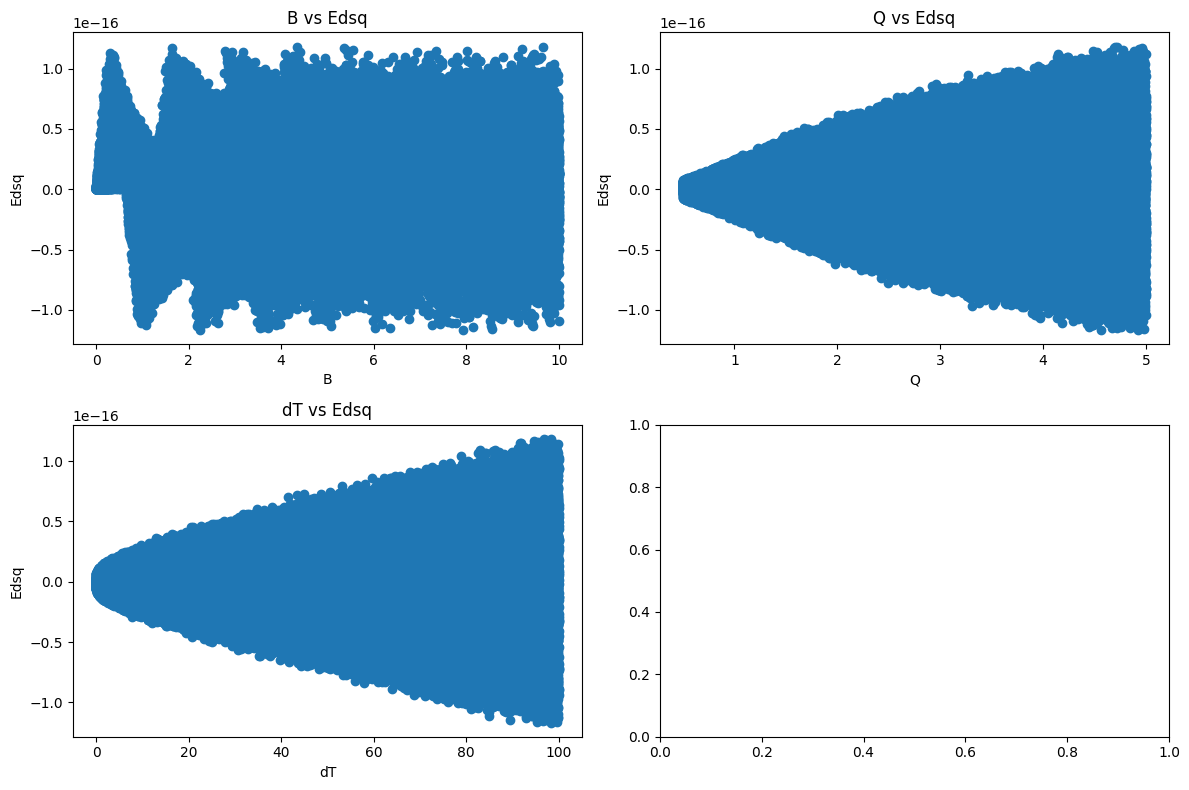

In [16]:
features = ['B', 'Q', 'dT']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    axes[row, col].scatter(df[feature], df['Edsq'])
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Edsq')
    axes[row, col].set_title(f'{feature} vs Edsq')

plt.tight_layout()
plt.show()

Could observe sin pattern in B, after a lot of trial and error found BxQ

In [17]:
df['BxQ']=df['B']*df['Q']

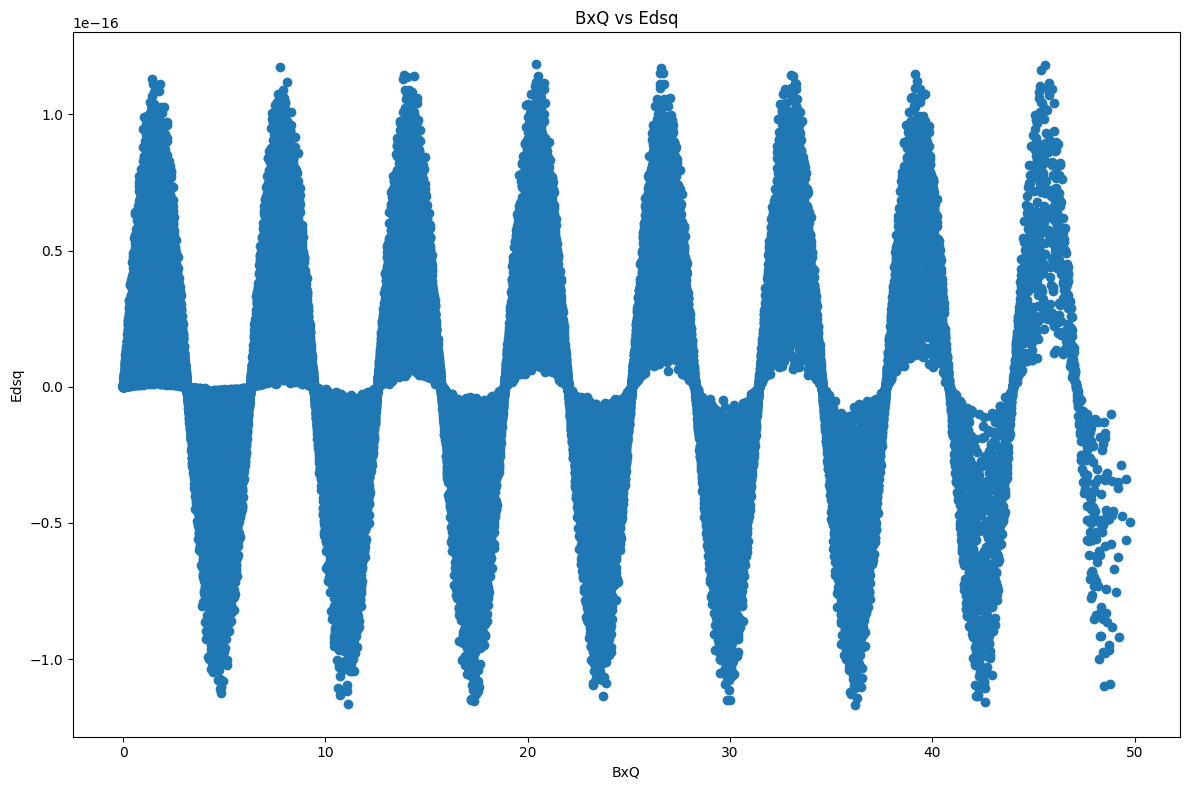

In [18]:

feature = 'BxQ'


fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(df[feature], df['Edsq'])
ax.set_xlabel(feature)
ax.set_ylabel('Edsq')
ax.set_title(f'{feature} vs Edsq')

plt.tight_layout()
plt.show()

Finding best alpha for sin(alpha*BxQ)

Best α: 1.001801801801802, Max correlation: 0.8452872258028394


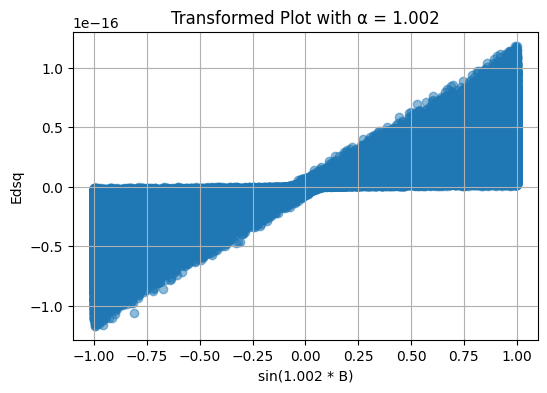

In [19]:
from scipy.stats import pearsonr

BxQ = df['BxQ'].values
Edsq = df['Edsq'].values

alphas = np.linspace(0.1, 10, 1000)  #Testing alpha values between 0.1 and 10
best_alpha = None
best_correlation = -np.inf

for alpha in alphas:
    transformed_BxQ = np.sin(alpha * BxQ)
    corr, _ = pearsonr(transformed_BxQ, Edsq)

    if abs(corr) > best_correlation:
        best_correlation = abs(corr)
        best_alpha = alpha

print(f"Best α: {best_alpha}, Max correlation: {best_correlation}")

plt.figure(figsize=(6, 4))
plt.scatter(np.sin(best_alpha * BxQ), Edsq, alpha=0.5)
plt.xlabel(f"sin({best_alpha:.3f} * B)")
plt.ylabel("Edsq")
plt.title(f"Transformed Plot with α = {best_alpha:.3f}")
plt.grid(True)
plt.show()

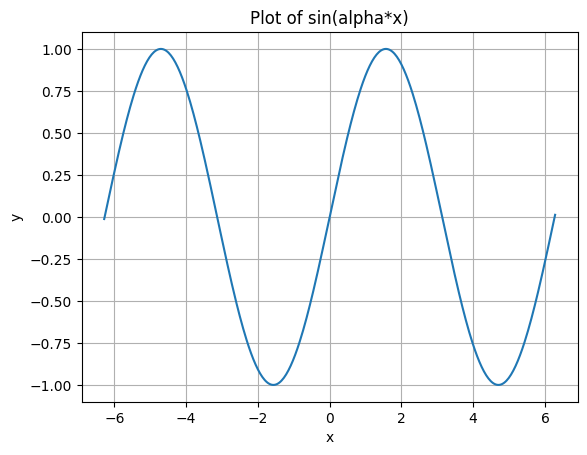

In [20]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 400)
y = np.sin(1.002* x)

plt.plot(x, y)
plt.title('Plot of sin(alpha*x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

New feature sin(1.002* B * Q)

In [21]:
df['BxQ_'] = np.sin(df['BxQ']*1.002)

In [22]:
df['EdBxQ']=df['E']/(df['BxQ_']*df['d_'])

In [23]:
print(df.head())

              d         B         Q         dT          E  E_rounded  \
0  1.935247e-09  5.807790  1.771646  15.705398  -3.221133       -3.0   
1  4.758500e-09  5.269716  2.564045   9.550877   0.652858        1.0   
2  3.033427e-09  4.932127  2.510767  47.348940  -0.819294       -1.0   
3  8.644913e-10  3.650966  1.413866  88.453402 -40.038999      -40.0   
4  8.643731e-10  6.579313  1.749179  30.922074 -26.695892      -27.0   

             d_          Edsq        BxQ      BxQ_         EdBxQ  
0  2.670099e+17 -1.206372e-17  10.289348 -0.774009  1.558602e-17  
1  4.416313e+16  1.478286e-17  13.511788  0.826263  1.789123e-17  
2  1.086758e+17 -7.538882e-18  12.383419 -0.157526  4.785797e-17  
3  1.338070e+18 -2.992296e-17   5.161977 -0.896091  3.339275e-17  
4  1.338436e+18 -1.994559e-17  11.508396 -0.859841  2.319684e-17  


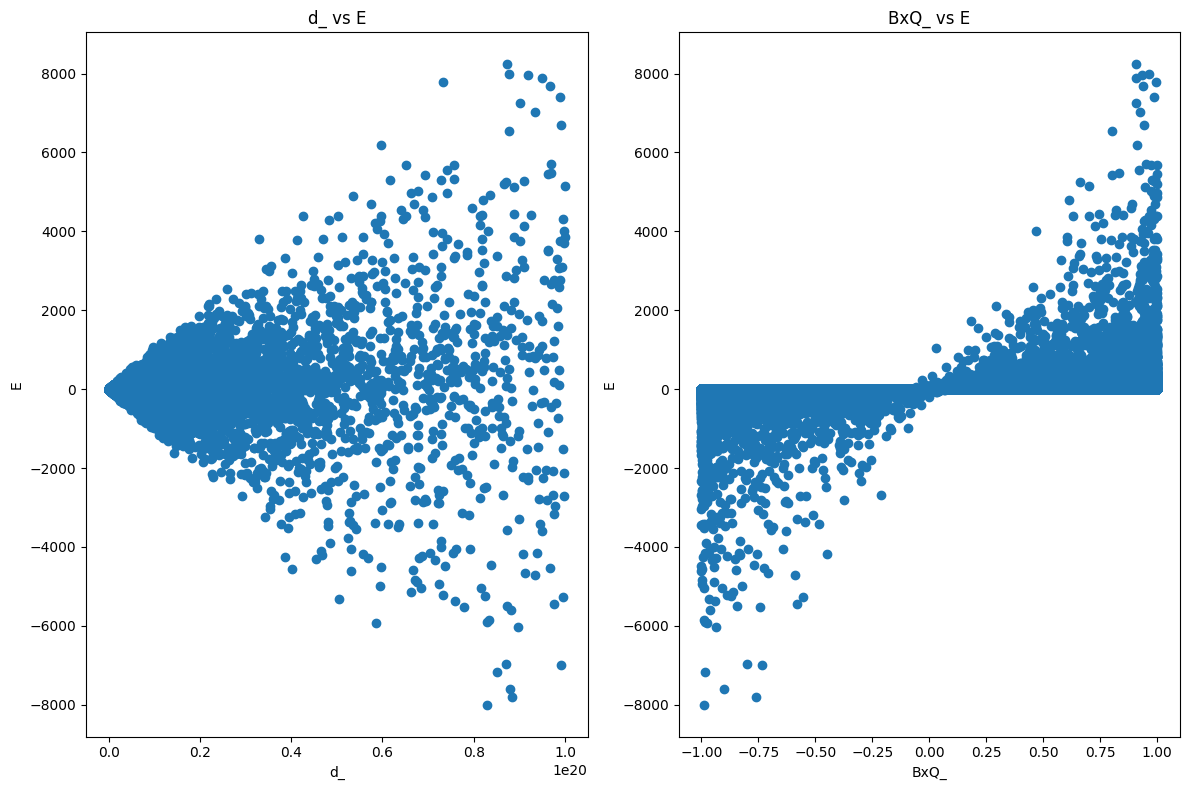

In [24]:
features = ['d_', 'BxQ_']

fig, axes = plt.subplots(1, 2, figsize=(12, 8))

for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df['E'])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('E')
    axes[i].set_title(f'{feature} vs E')

plt.tight_layout()
plt.show()

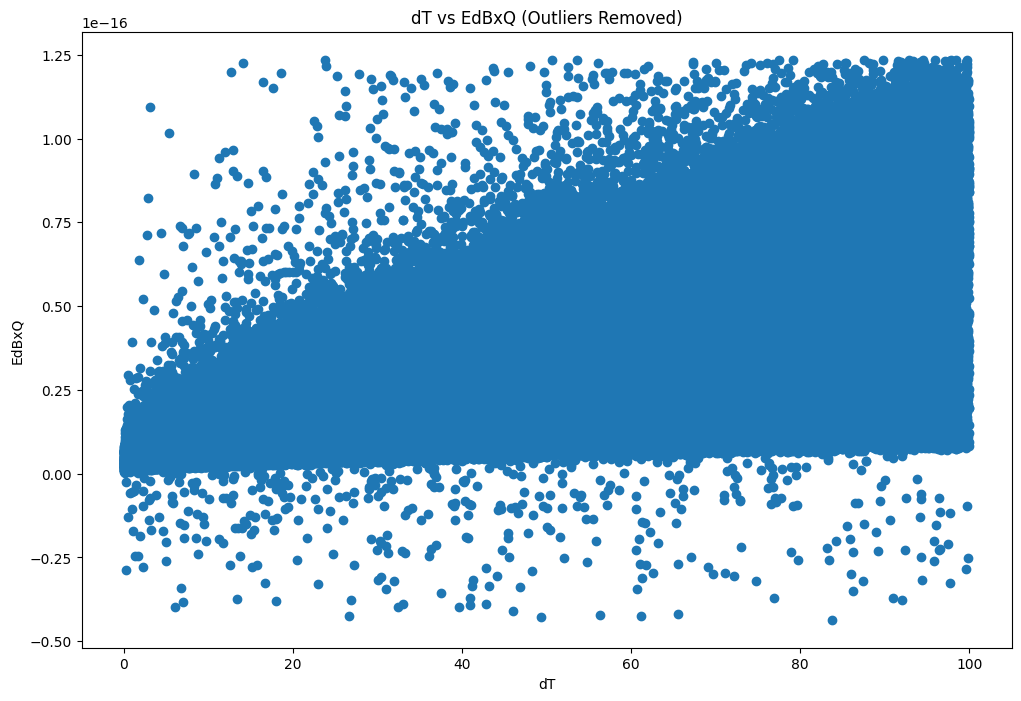

In [25]:
#Removing outliers using the IQR method for better graph
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


df_filtered = remove_outliers(df, 'EdBxQ')


plt.figure(figsize=(12, 8))
plt.scatter(df_filtered['dT'], df_filtered['EdBxQ'])
plt.xlabel('dT')
plt.ylabel('EdBxQ')
plt.title('dT vs EdBxQ (Outliers Removed)')
plt.show()

No apparent pattern betweeen E*d^2/sin(1.002 * B *Q)

Plotting dT vs (E*d^2)^2

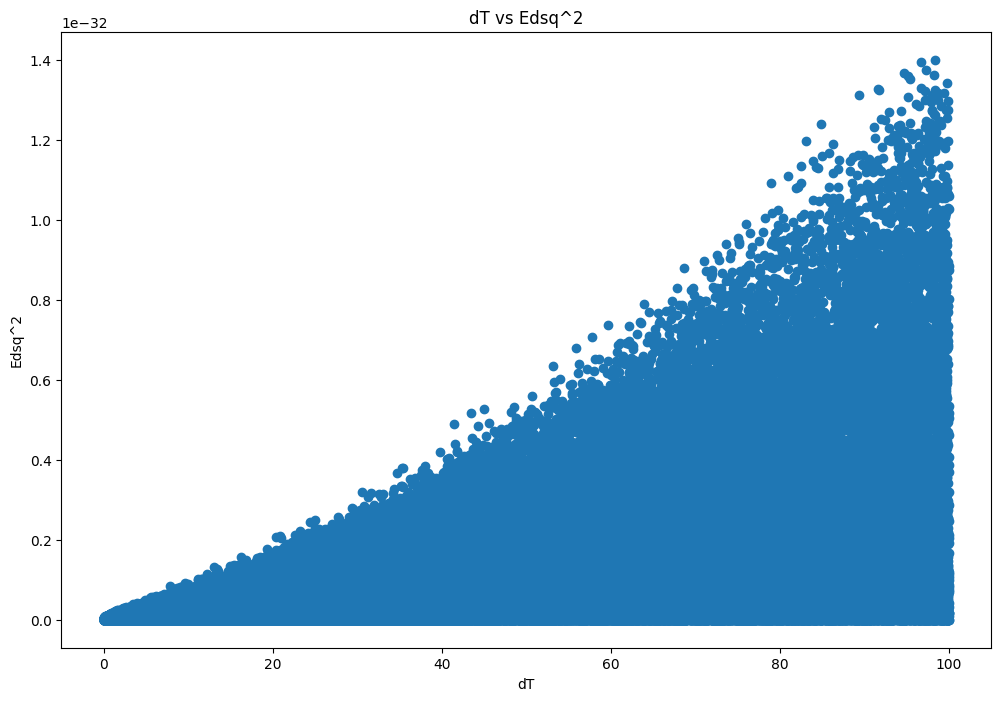

In [406]:
plt.figure(figsize=(12, 8))
plt.scatter(df['dT'], df['Edsq']**2)
plt.xlabel('dT')
plt.ylabel('Edsq^2')
plt.title('dT vs Edsq^2')
plt.show()

This suggests E*d^2 is proportional to dT^1/2

In [26]:
df['dT_']= df['dT']**1/2

In [27]:
print(df.head())

              d         B         Q         dT          E  E_rounded  \
0  1.935247e-09  5.807790  1.771646  15.705398  -3.221133       -3.0   
1  4.758500e-09  5.269716  2.564045   9.550877   0.652858        1.0   
2  3.033427e-09  4.932127  2.510767  47.348940  -0.819294       -1.0   
3  8.644913e-10  3.650966  1.413866  88.453402 -40.038999      -40.0   
4  8.643731e-10  6.579313  1.749179  30.922074 -26.695892      -27.0   

             d_          Edsq        BxQ      BxQ_         EdBxQ        dT_  
0  2.670099e+17 -1.206372e-17  10.289348 -0.774009  1.558602e-17   7.852699  
1  4.416313e+16  1.478286e-17  13.511788  0.826263  1.789123e-17   4.775438  
2  1.086758e+17 -7.538882e-18  12.383419 -0.157526  4.785797e-17  23.674470  
3  1.338070e+18 -2.992296e-17   5.161977 -0.896091  3.339275e-17  44.226701  
4  1.338436e+18 -1.994559e-17  11.508396 -0.859841  2.319684e-17  15.461037  


In [28]:
df = df[['d', 'B', 'Q', 'BxQ', 'dT', 'd_', 'BxQ_', 'dT_', 'E']]

In [29]:
print(df.head())

              d         B         Q        BxQ         dT            d_  \
0  1.935247e-09  5.807790  1.771646  10.289348  15.705398  2.670099e+17   
1  4.758500e-09  5.269716  2.564045  13.511788   9.550877  4.416313e+16   
2  3.033427e-09  4.932127  2.510767  12.383419  47.348940  1.086758e+17   
3  8.644913e-10  3.650966  1.413866   5.161977  88.453402  1.338070e+18   
4  8.643731e-10  6.579313  1.749179  11.508396  30.922074  1.338436e+18   

       BxQ_        dT_          E  
0 -0.774009   7.852699  -3.221133  
1  0.826263   4.775438   0.652858  
2 -0.157526  23.674470  -0.819294  
3 -0.896091  44.226701 -40.038999  
4 -0.859841  15.461037 -26.695892  


In [30]:
df['d_*BxQ_']=df['BxQ_']*df['d_']

Defining a new fucntion based on all findings

In [31]:
df['function']=df['BxQ_']*df['d_']*df['dT_']

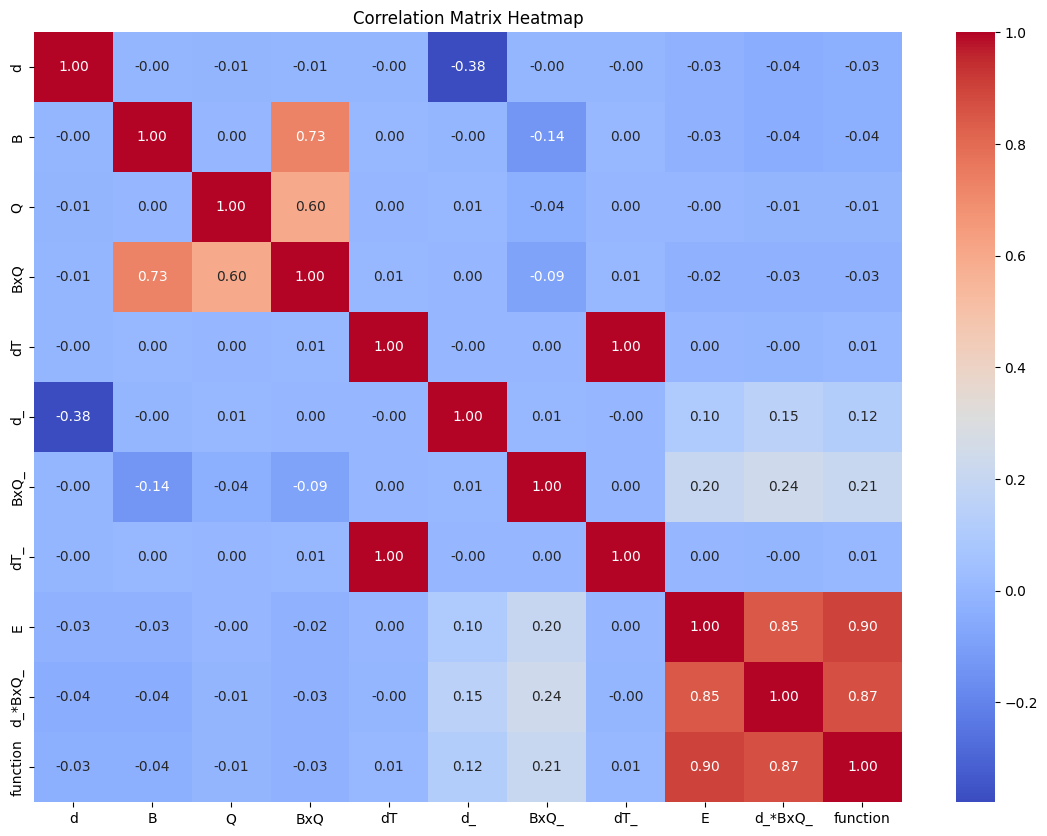

In [32]:
correlation_matrix = df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

We can see a correlation of 0.90 between the function found and E.

##The function is E = (sin(1.002   * B *   Q)*dT^1/2)/d^2

In [34]:
from sklearn.feature_selection import f_regression


X = df.drop(columns=['E'])
y = df['E']

f_values, p_values = f_regression(X, y)

results_df = pd.DataFrame({'Feature': X.columns, 'F-value': f_values, 'p-value': p_values})
print(results_df)

    Feature        F-value        p-value
0         d      54.974724   1.232663e-13
1         B      56.555711   5.518520e-14
2         Q       0.024470   8.756954e-01
3       BxQ      39.116937   4.011363e-10
4        dT       0.302076   5.825855e-01
5        d_     856.313824  2.884945e-187
6      BxQ_    3476.497955   0.000000e+00
7       dT_       0.302076   5.825855e-01
8   d_*BxQ_  210974.210784   0.000000e+00
9  function  356286.637625   0.000000e+00


Significant f-value for found function

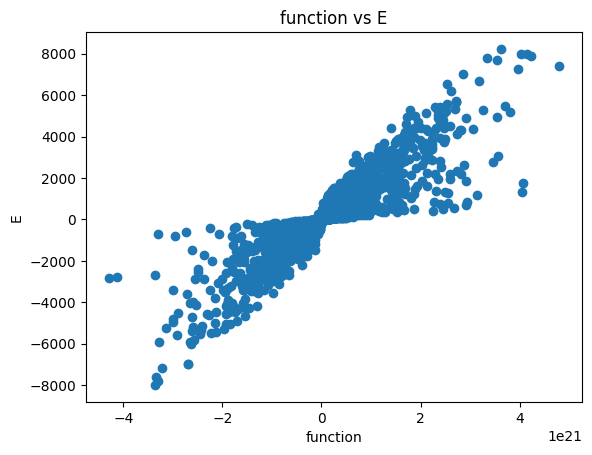

In [37]:
plt.scatter(df['function'], df['E'])
plt.xlabel('function')
plt.ylabel('E')
plt.title('function vs E')
plt.show()

Mean Squared Error: 15215.023563915445
R-squared: 0.8291981434853746


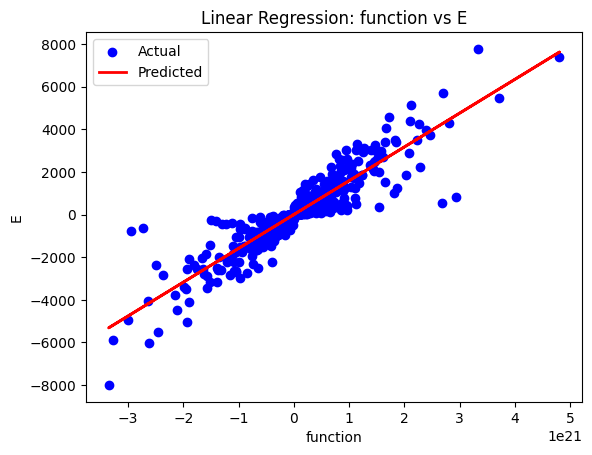

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['function']]
y = df['E']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('function')
plt.ylabel('E')
plt.title('Linear Regression: function vs E')
plt.legend()
plt.show()